<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/DL/ANN/ANN%20(Regressor).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Free Style and Show-off in ANNs
> Here you are allowed to use every thing you've learnt and search for everything you didn't

Good Luck Buddy!

## Master Task :-
* Build Your Own  Artificial Neural Network in Tensorflow  
* First Perform EDA 
* Second Do Your Modeling Routine 
* Third Visualize in Fancy ways 
* Fourth Save Your Model and Prepare your Inference 
> Use Bike Data 

- In this project, you'll build your first neural network and use it to predict daily bike rental ridership.

## Packages Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('drive/MyDrive/Fusion')

In [ ]:
!ls

 50_Startups.csv	   hour.csv	        slr02.xlsx
 boston.csv		   Insurance.xlsx       Social_Network_Ads.csv
'Concrete_Data (4).xlsx'   Mall_Customers.csv   u.data
 day.csv		   Movie_Id_Titles      unprocessed_data.csv
 diabetes_null.csv	   Salary_Data.csv


In [ ]:
pip install mplcyberpunk  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanSquaredError

## Loading the "Hours csv" File into a pandas dataframe

In [ ]:
riders = pd.read_csv('hour.csv')
df = riders.copy()

##  Showing  the Head of the Data

In [ ]:
df.head() 

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis.

### Descriptive Statistics

In [ ]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Correlation

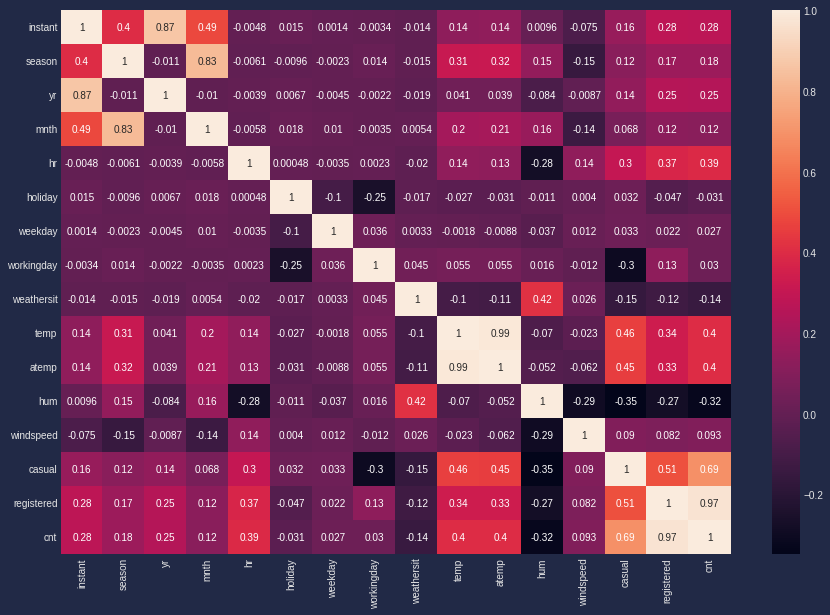

In [ ]:
# Using Heatmap to visualize the Correlation.
plt.style.use("cyberpunk")
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

plt.show()

### features Disturbtions 

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# season 
label = ['fall','summer','springer','winter']
data = df['season'].value_counts()

In [ ]:
label

['fall', 'summer', 'springer', 'winter']

In [ ]:
data

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

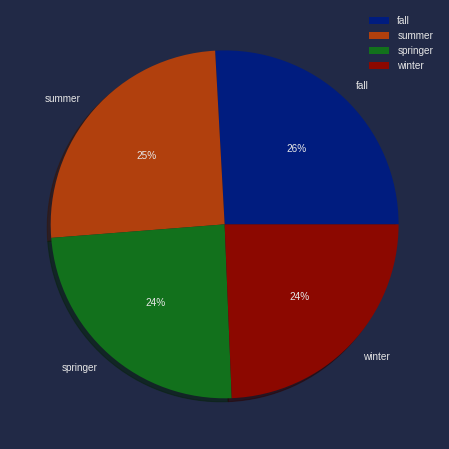

In [ ]:
colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.show()

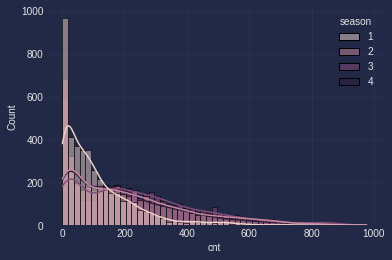

In [ ]:
sns.histplot(x='cnt', data=df, kde=True,hue='season')

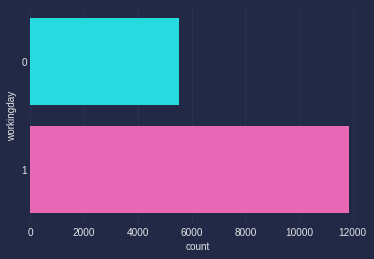

In [ ]:
# workingday 
sns.countplot(y='workingday',data=df)

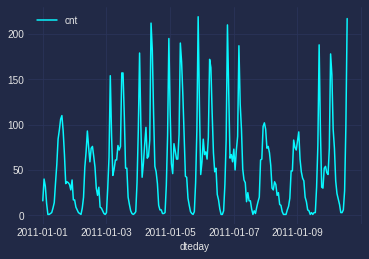

In [ ]:
# showing the number of bike riders over the first 10 days 
df[:24*10].plot(x='dteday',y='cnt')

### Check a Missing Value

In [ ]:
print(riders.isnull().sum().sort_values(ascending=False))

instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64




### examine the numerical features.

In [ ]:
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.columns)
print('****************************************************************************')
print(f'There is {numeric_features.shape[1]} numeric features.')

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
****************************************************************************
There is 16 numeric features.


###  categorical variables

In [ ]:
dummy_cols = ['season','mnth','hr','weekday','weathersit']
df = pd.get_dummies(df,columns=dummy_cols)

### Drop Un Necessary Columns 

In [ ]:
df.drop(['instant','dteday','atemp','workingday'],axis=1,inplace=True)

In [ ]:
df.shape

(17379, 59)

## Data preprocessing

### Data Splitting

In [ ]:
target_list = ['cnt', 'casual', 'registered']
X = df.drop(target_list,axis=1)
y = df[target_list]

print(f' Shape of X: {X.shape} \n Shape of y: {y.shape}')

 Shape of X: (17379, 56) 
 Shape of y: (17379, 3)


### Feature Selection

In [ ]:
rfe = RFE(RandomForestRegressor(n_estimators=20),n_features_to_select=40)

In [ ]:
rfe.fit(X,y)
selected_features = rfe.transform(X)
rfe.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
        True, False])

In [ ]:
rfe_feature = X.loc[:,rfe.get_support()].columns.tolist()
print(rfe_feature)
print('*******************************************************************************************')
print(str(len(rfe_feature)), 'selected features')

['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_1', 'season_2', 'season_4', 'mnth_9', 'mnth_10', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_5', 'weekday_6', 'weathersit_1', 'weathersit_3']
*******************************************************************************************
40 selected features


In [ ]:
X  = df[rfe_feature]
y = df[target_list]

print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (17379, 40) 
 y_shape: (17379, 3)


### Data Scaling


In [ ]:
scl = StandardScaler()
X_rescale = scl.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(f' Shape of X_train: {X_train.shape} & Shape of X_test: {X_test.shape}')
print(f' Shape of y_train: {y_train.shape} & Shape of y_test: {y_test.shape}')



 Shape of X_train: (13903, 40) & Shape of X_test: (3476, 40)
 Shape of y_train: (13903, 3) & Shape of y_test: (3476, 3)


### Model Building 

In [ ]:
model = Sequential()
model.add(Dense(units=128,activation="relu", input_dim=40))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=3))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5248      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                                 
Total params: 15,683
Trainable params: 15,683
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=20,validation_split=0.2,shuffle=True)

Epoch 1/20
348/348 [==============================] - 2s 4ms/step - loss: 16166.2021 - val_loss: 6130.8579
Epoch 2/20
348/348 [==============================] - 1s 3ms/step - loss: 5114.4839 - val_loss: 4588.2925
Epoch 3/20
348/348 [==============================] - 1s 3ms/step - loss: 3261.0618 - val_loss: 2610.0464
Epoch 4/20
348/348 [==============================] - 1s 3ms/step - loss: 2105.3093 - val_loss: 2105.4541
Epoch 5/20
348/348 [==============================] - 1s 3ms/step - loss: 1822.3220 - val_loss: 2006.3240
Epoch 6/20
348/348 [==============================] - 1s 3ms/step - loss: 1718.1719 - val_loss: 1811.8145
Epoch 7/20
348/348 [==============================] - 1s 3ms/step - loss: 1622.9753 - val_loss: 1912.3274
Epoch 8/20
348/348 [==============================] - 1s 3ms/step - loss: 1586.5442 - val_loss: 1779.5312
Epoch 9/20
348/348 [==============================] - 1s 3ms/step - loss: 1545.3695 - val_loss: 1768.3094
Epoch 10/20
348/348 [========================

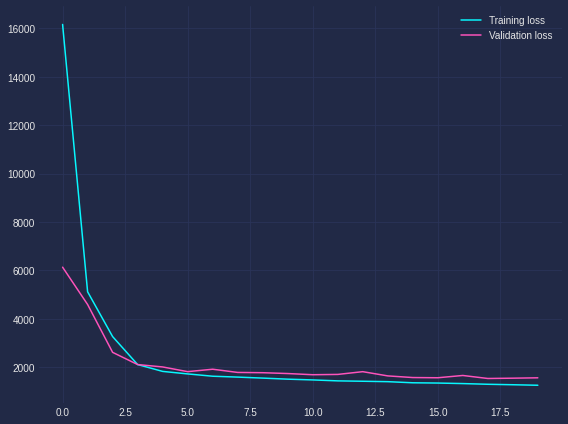

In [ ]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Training loss")
ax.plot(np.arange(0, num_epochs), model_history["val_loss"], 
        label="Validation loss")
ax.legend()

plt.tight_layout()
plt.show()

Test loss: 1408.62353515625


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([[415.0706   , 158.52359  , 255.09473  ],
       [ 83.285    ,   8.143775 ,  77.08308  ],
       [  8.291581 ,   2.4649625,   6.085471 ],
       ...,
       [ 80.41945  ,  10.093029 ,  69.358955 ],
       [280.997    ,  72.510635 , 207.12311  ],
       [236.63553  ,  13.746291 , 224.26396  ]], dtype=float32)

In [ ]:
y_test

,cnt,casual,registered
12830,425,185,240
8688,88,5,83
7091,4,1,3
12230,526,69,457
431,13,5,8
...,...,...,...
6759,17,0,17
13989,85,19,66
173,98,8,90
16192,266,82,184


In [ ]:
r2_score(y_test,y_pred)

0.898785781405118

### Check out predictions

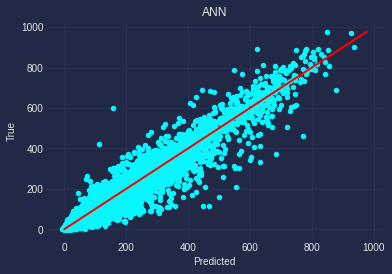

In [ ]:
plt.scatter(y_pred, y_test, s=20)
plt.plot([y_test['cnt'].min(), y_test['cnt'].max()], [y_test['cnt'].min(), y_test['cnt'].max()], 'r', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("ANN")
plt.show()

